<h1 style="color:blue;">Group 4 Final Project</h1>


https://mesonet.agron.iastate.edu/request/download.phtml?network=NJ_ASOS

<font size="5">Members:</font> <br> Birendra Khimding <br> Muzhgan Rustaqi <br> Andrew Fennimore

In [6]:
import pandas as pd
import numpy as np


# pull from the MJX
url = "https://raw.githubusercontent.com/Fenn3963/Weather-Impact-on-Air-Traffic-Management/refs/heads/main/MJX.csv"

#All values with na are labeled as M
weather = pd.read_csv("MJX.csv" , na_values= "M")

<h3 style="color:blue;"><u>Cleaning and Describing Data</u></h3>

In [10]:
from IPython.display import display, HTML


#################################################################################################

# Column descriptions dictionary
column_descriptions = {
    "station": "Three or four character site identifier",
    "valid": "Timestamp of the observation",
    "tmpf": "Air Temperature in Fahrenheit, typically @ 2 meters",
    "dwpf": "Dew Point Temperature in Fahrenheit, typically @ 2 meters",
    "relh": "Relative Humidity in %",
    "drct": "Wind Direction in degrees from *true* north",
    "sknt": "Wind Speed in knots",
    "p01i": "One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. This varies slightly by site. Values are in inches. This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means. Unfortunately, we do not know of an authoritative database denoting which station has which sensor.",
    "alti": "Pressure altimeter in inches",
    "mslp": "Sea Level Pressure in millibar",
    "vsby": "Visibility in miles",
    "gust": "Wind Gust in knots",
    "skyc1": "Sky Level 1 Coverage",
    "skyc2": "Sky Level 2 Coverage",
    "skyc3": "Sky Level 3 Coverage",
    "skyc4": "Sky Level 4 Coverage",
    "skyl1": "Sky Level 1 Altitude in feet",
    "skyl2": "Sky Level 2 Altitude in feet",
    "skyl3": "Sky Level 3 Altitude in feet",
    "skyl4": "Sky Level 4 Altitude in feet",
    "wxcodes": "Present Weather Codes (space separated)",
    "feel": "Apparent Temperature (Wind Chill or Heat Index) in Fahrenheit",
    "ice_accretion_1hr": "Ice Accretion over 1 Hour (inches)",
    "ice_accretion_3hr": "Ice Accretion over 3 Hours (inches)",
    "ice_accretion_6hr": "Ice Accretion over 6 Hours (inches)",
    "peak_wind_gust": "Peak Wind Gust (from PK WND METAR remark) (knots)",
    "peak_wind_drct": "Peak Wind Gust Direction (from PK WND METAR remark) (deg)",
    "peak_wind_time": "Peak Wind Gust Time (from PK WND METAR remark)",
    "metar": "Unprocessed reported observation in METAR format"
}

#################################################################################################
# Split up the quantitative and qualitative data
quant = weather.select_dtypes(include=["number"])
qual = weather.select_dtypes(exclude=["number"])

# create dictionary of the statsistical information and descriptions
stats_dict = {}

#################################################################################################

# Quantitative stats
for col in quant.columns:
    mode_values = quant[col].mode().dropna().tolist()
    if mode_values:
        mode = mode_values
    else:
        mode = None
    
    # Calculate stats and give description
    count = quant[col].count()
    mean = round(quant[col].mean(), 2)
    median = round(quant[col].median(), 2)
    std = round(quant[col].std(), 2)
    data_type = "Quantitative"
    description = column_descriptions.get(col)
    
    # Find the percentage of null values
    null_percentage = round((quant[col].isnull().sum() / len(quant[col])) * 100, 2) #find percentage of values with "none"

    # Create stats dictionary
    stats = {
        "Description": description,
        "Data Type": data_type,
        "Count": count,
        "Mean": mean,
        "Median": median,
        "Std": std,
        "Mode": mode,
        "Null Percentage": f"{null_percentage}%"  #% that doesn't have values
    }
    
    # Filter out None values to then store in the dictionary, used to calculate percentage 
    stats_filtered = {}
    for k, v in stats.items():
        if v is not None:
            stats_filtered[k] = v

    stats_dict[col] = stats_filtered
    
#################################################################################################

# Qualitative stats
for col in qual.columns:
    mode_values = qual[col].mode().dropna().tolist()
    
    # If every value is unique, set mode to None
    if len(mode_values) == len(qual[col].dropna().unique()):
        mode_output = None
    else:
        if mode_values:
            mode_output = mode_values
        else:
            mode_output = None

    # Get the count 
    if mode_output is not None:
        most_frequent_count = qual[col].value_counts().iloc[0]
    else:
        most_frequent_count = None
    
    # Calculate all the stats for qualitative portion
    count = qual[col].count()
    unique_values = qual[col].nunique()
    data_type = "Qualitative"
    description = column_descriptions.get(col, "No description available")
    
    # Calculate the percentage of null values
    null_percentage = round((qual[col].isnull().sum() / len(qual[col])) * 100, 2) #find percentage of values with the none value

    # Create stats dictionary
    stats = {
        "Description": description,
        "Data Type": data_type,
        "Count": count,
        "Mode": mode_output,
        "Unique Values": unique_values,
        "Most Frequent Count": most_frequent_count,
        "Null Percentage": f"{null_percentage}%"
    }
    
    # Filter out None values and store in stats_dict
    stats_filtered = {}
    for k, v in stats.items():
        if v is not None:
            stats_filtered[k] = v
    stats_dict[col] = stats_filtered 

#################################################################################################

# Print the statistics and description
html_code = '<p style="font-size:20px; color:green;">Description of columns:</p>'
display(HTML(html_code)) #makes it look nicer 

#print all of the variables and statistics associated
for col, stats in stats_dict.items():
    print(f"\nStatistics for '{col}':")
    for key, value in stats.items():
        print(f"  {key}: {value}")


Statistics for 'tmpf':
  Description: Air Temperature in Fahrenheit, typically @ 2 meters
  Data Type: Quantitative
  Count: 11418
  Mean: 54.56
  Median: 54.0
  Std: 18.48
  Mode: [59.0]
  Null Percentage: 0.04%

Statistics for 'dwpf':
  Description: Dew Point Temperature in Fahrenheit, typically @ 2 meters
  Data Type: Quantitative
  Count: 11416
  Mean: 45.75
  Median: 48.0
  Std: 18.53
  Mode: [59.0]
  Null Percentage: 0.06%

Statistics for 'relh':
  Description: Relative Humidity in %
  Data Type: Quantitative
  Count: 11416
  Mean: 75.4
  Median: 80.83
  Std: 20.79
  Mode: [100.0]
  Null Percentage: 0.06%

Statistics for 'drct':
  Description: Wind Direction in degrees from *true* north
  Data Type: Quantitative
  Count: 11141
  Mean: 162.4
  Median: 180.0
  Std: 122.03
  Mode: [0.0]
  Null Percentage: 2.47%

Statistics for 'sknt':
  Description: Wind Speed in knots
  Data Type: Quantitative
  Count: 11415
  Mean: 6.03
  Median: 6.0
  Std: 4.7
  Mode: [0.0]
  Null Percentage: 0.

Initial thoughts:<br>After looking closer at the columns, some should very clearly not be used for analysis. Skyl4, ice_accretion_1hr, ice_accretion_3hr, ice_accretion_6hr, and snowdepth all have no values for analysis and can be removed. There are also a lot of null values for some of the columns, and should be dealt with careful to preserve data integrity. 

#### Creating seperate charts of the stats so it is easier to view

In [12]:
#Create a seperate csv file of dictionary so it is easier to view
des_chart = pd.DataFrame(stats_dict).T  # transpose to have variables as rows

# Drop the description since I am putting it in another seperate csv
if "Description" in des_chart.columns:
    des_chart = des_chart.drop(columns=["Description"])

# filename used, can easily change if need be
filename = "weather_variables.csv"

# Save as csv to a whole new file
des_chart.to_csv(filename, index=True)

In [22]:
#Creates a separate csv to show variable's descriptions
descriptions = pd.DataFrame(list(column_descriptions.items()), columns=["Variable", "Description"]) #single out the descriptions from the dictionary

# Define the CSV filename
filename = "variable_descriptions.csv"
descriptions.to_csv(filename, index=False) 

#### Dealing with missing data

In [14]:
# Number of Missing vlaues in the dataframe
weather.isna().sum()

station                  0
valid                    0
tmpf                     5
dwpf                     7
relh                     7
drct                   282
sknt                     8
p01i                     3
alti                   111
mslp                  2495
vsby                     1
gust                  9568
skyc1                   30
skyc2                 9246
skyc3                10618
skyc4                11423
skyl1                 4939
skyl2                 9246
skyl3                10618
skyl4                11423
wxcodes               9072
ice_accretion_1hr    11423
ice_accretion_3hr    11423
ice_accretion_6hr    11423
peak_wind_gust       10971
peak_wind_drct       10971
peak_wind_time       10971
feel                     9
metar                    0
snowdepth            11423
dtype: int64

In [24]:
# Setting a threshold to remove any column with more then 15% missing value
threshold = len(weather)*.15
cols_drop_nan = weather.columns[weather.isna().sum() <= threshold]

# Drop row with missing values
weather.dropna(subset=cols_drop_nan, inplace=True)
weather.isna().sum()

station                  0
valid                    0
tmpf                     0
dwpf                     0
relh                     0
drct                     0
sknt                     0
p01i                     0
alti                     0
mslp                  2305
vsby                     0
gust                  9208
skyc1                    0
skyc2                 8907
skyc3                10235
skyc4                10996
skyl1                 4751
skyl2                 8907
skyl3                10235
skyl4                10996
wxcodes               8732
ice_accretion_1hr    10996
ice_accretion_3hr    10996
ice_accretion_6hr    10996
peak_wind_gust       10557
peak_wind_drct       10557
peak_wind_time       10557
feel                     0
metar                    0
snowdepth            10996
dtype: int64

In [25]:
# Droping columns with more then 15% missing values

cols_to_drop = weather.columns[weather.isna().sum() > 0]
print(cols_to_drop)
weather.drop(columns=cols_to_drop , inplace=True)
weather.isna().sum()

Index(['mslp', 'gust', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3',
       'skyl4', 'wxcodes', 'ice_accretion_1hr', 'ice_accretion_3hr',
       'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct',
       'peak_wind_time', 'snowdepth'],
      dtype='object')


station    0
valid      0
tmpf       0
dwpf       0
relh       0
drct       0
sknt       0
p01i       0
alti       0
vsby       0
skyc1      0
feel       0
metar      0
dtype: int64

In [26]:
# Renaming Column names 

weather.rename(columns={'valid': 'timestamp', 'tmpf': 'air_temperature','dwpf':'dew_temperature', 'relh':'humidity', 'drct':'wind_direction', 'sknt':'wind_speed', 'p01i':'one_hour_precp' , 'alti':'pressure_altimeter', 'vsby':'visibility', 'skyc1':'cloud_coverage', 'feel':'apparent_temp', 'metar':'unprocessed_observation'  } , inplace=True)
weather.columns

Index(['station', 'timestamp', 'air_temperature', 'dew_temperature',
       'humidity', 'wind_direction', 'wind_speed', 'one_hour_precp',
       'pressure_altimeter', 'visibility', 'cloud_coverage', 'apparent_temp',
       'unprocessed_observation'],
      dtype='object')

In [27]:
# Checking for the columns data type
weather.dtypes



station                     object
timestamp                   object
air_temperature            float64
dew_temperature            float64
humidity                   float64
wind_direction             float64
wind_speed                 float64
one_hour_precp              object
pressure_altimeter         float64
visibility                 float64
cloud_coverage              object
apparent_temp              float64
unprocessed_observation     object
dtype: object

In [28]:
#Replacing Char value to float 

weather['one_hour_precp'] = weather['one_hour_precp'].replace('T', '0.001')
print(weather['one_hour_precp'].unique())

['0.00' '0.02' '0.001' '0.01' '0.04' '0.07' '0.09' '0.03' '0.10' '0.17'
 '0.08' '0.06' '0.05' '0.14' '0.16' '0.11' '0.33' '0.29' '0.18' '0.12'
 '0.26' '0.15' '0.13' '0.27' '0.25' '0.36' '0.42' '0.19' '0.21' '0.35'
 '0.41' '0.45' '0.54' '0.57' '0.58' '0.32' '0.37' '0.38' '0.31' '0.46'
 '0.22' '0.20' '0.43' '0.23' '0.40']


In [29]:
weather.dtypes

station                     object
timestamp                   object
air_temperature            float64
dew_temperature            float64
humidity                   float64
wind_direction             float64
wind_speed                 float64
one_hour_precp              object
pressure_altimeter         float64
visibility                 float64
cloud_coverage              object
apparent_temp              float64
unprocessed_observation     object
dtype: object

In [30]:
#Changing the one_hour_precp column data type to float
weather['one_hour_precp'] = weather['one_hour_precp'].astype(float)

In [31]:
# Checking for number of 0.0 vlueas in the dataframe
col_with_zeor = (weather == 0.0).sum()
print(col_with_zeor)

station                       0
timestamp                     0
air_temperature               1
dew_temperature              17
humidity                      0
wind_direction             2413
wind_speed                 2413
one_hour_precp             9015
pressure_altimeter            0
visibility                    0
cloud_coverage                0
apparent_temp                 1
unprocessed_observation       0
dtype: int64


In [32]:
# Catagorical Columns
weather.value_counts('cloud_coverage')

cloud_coverage
CLR    4751
OVC    2426
BKN    1574
FEW    1177
SCT    1056
VV       12
Name: count, dtype: int64

In [33]:
# Numerical Columns
round(weather.describe(),2)


,air_temperature,dew_temperature,humidity,wind_direction,wind_speed,one_hour_precp,pressure_altimeter,visibility,apparent_temp
count,10996.00,10996.00,10996.00,10996.00,10996.00,10996.00,10996.00,10996.00,10996.00
mean,54.36,45.68,75.69,162.26,6.05,0.00,30.02,8.90,52.88
std,18.42,18.55,20.66,122.10,4.73,0.03,0.23,2.60,21.26
min,-2.00,-6.00,15.73,0.00,0.00,0.00,29.26,0.25,-6.75
25%,41.00,32.00,59.65,30.00,3.00,0.00,29.88,10.00,36.76
50%,54.00,47.00,81.17,180.00,6.00,0.00,30.01,10.00,54.00
75%,69.80,60.00,93.45,280.00,9.00,0.00,30.16,10.00,69.80
max,100.00,80.60,100.00,360.00,30.00,0.58,30.96,10.00,114.20


Univariate EDA (Single Variable Analysis)

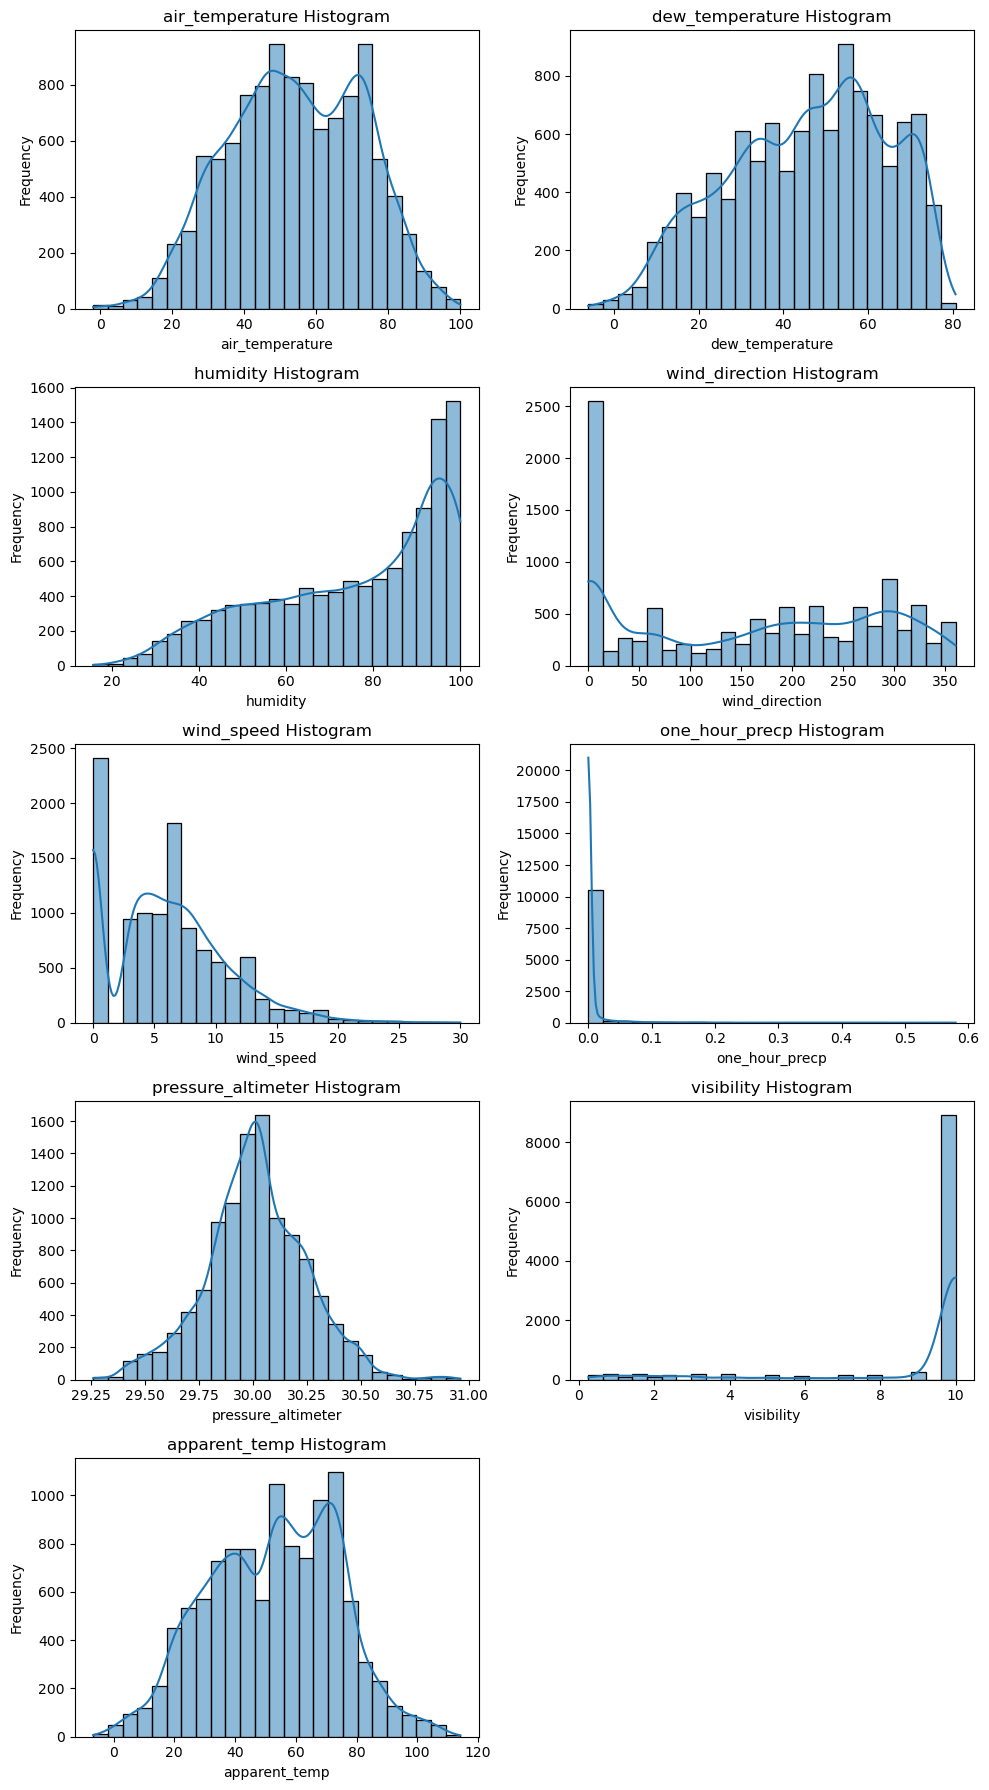

In [35]:
# Univariate EDA (Single Variable Analysis)

# Histogram for all the Numerical Column
import seaborn as sns 
import matplotlib.pyplot as plt 

columns_to_plot = ['air_temperature', 'dew_temperature', 'humidity','wind_direction' ,'wind_speed', 'one_hour_precp', 'pressure_altimeter', 'visibility', 'apparent_temp']

fig, axes = plt.subplots(5, 2, figsize=(10, 18)) 
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    sns.histplot(weather[col], kde=True, ax=axes[i], bins=25)  # kde=True adds a density curve
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

if len(columns_to_plot) < len(axes):
    axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

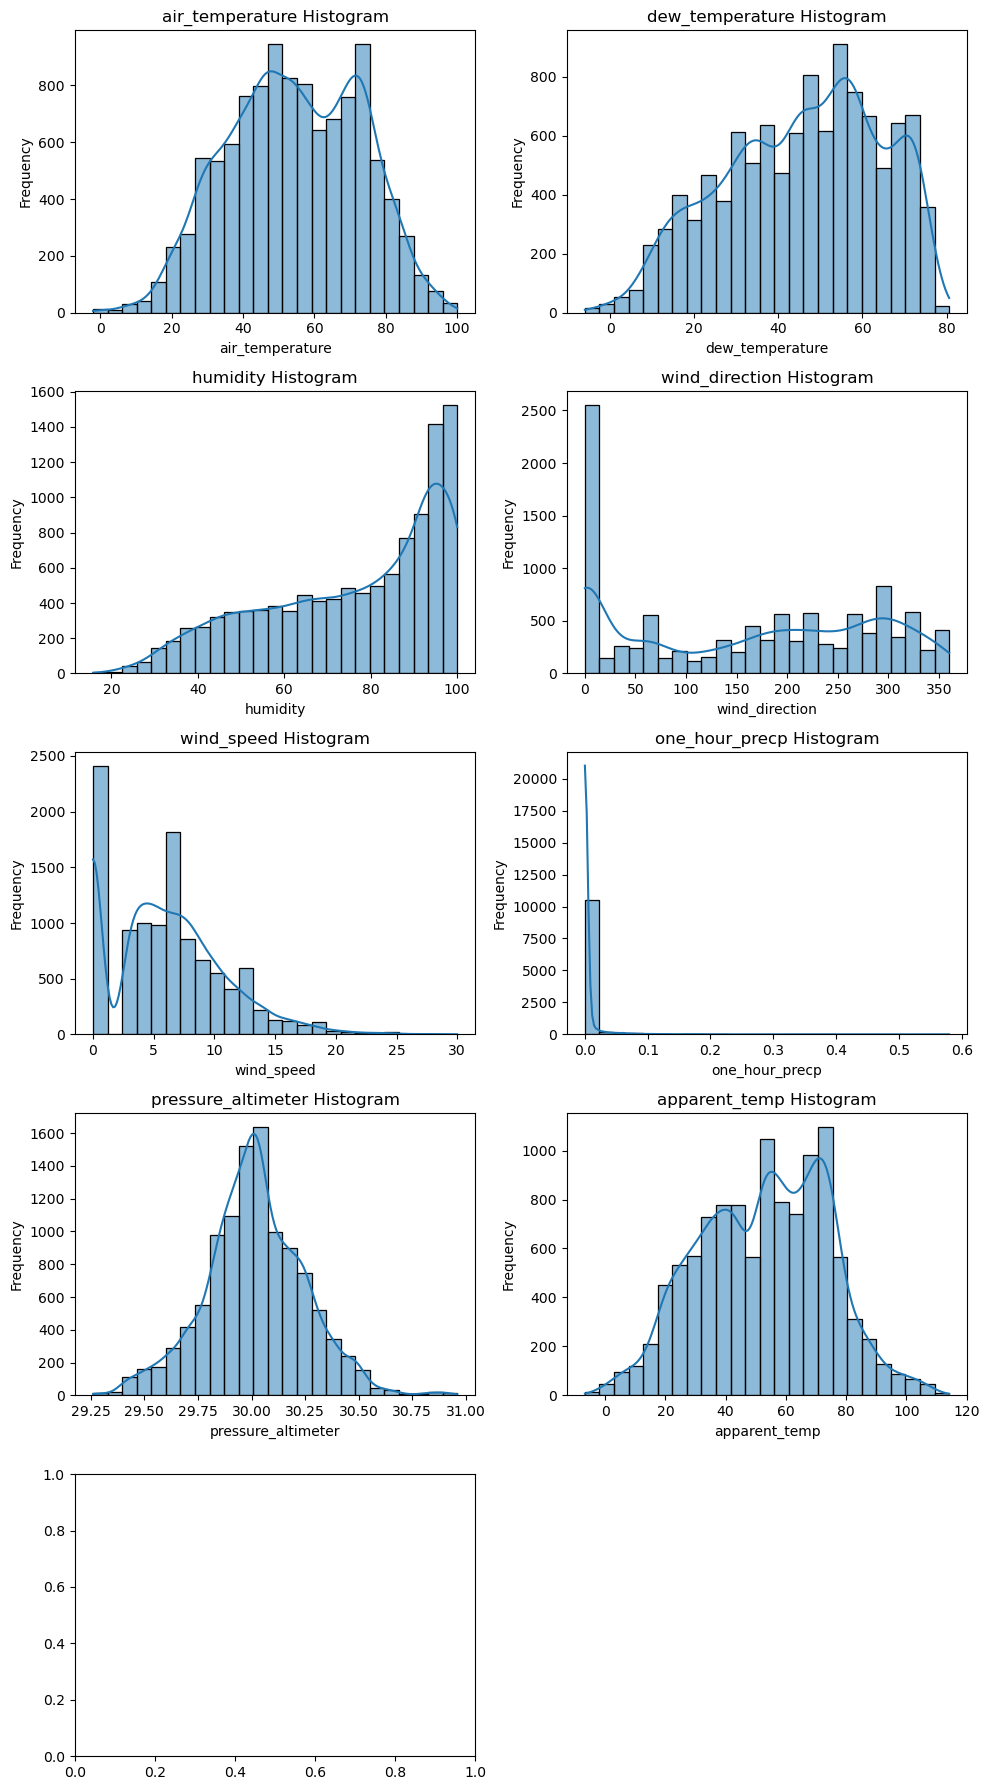

In [36]:
# Univariate EDA (Single Variable Analysis)

# Histogram for all the Numerical Column
import seaborn as sns 
import matplotlib.pyplot as plt 

columns_to_plot = ['air_temperature', 'dew_temperature', 'humidity','wind_direction' ,'wind_speed', 'one_hour_precp', 'pressure_altimeter', 'apparent_temp']

fig, axes = plt.subplots(5, 2, figsize=(10, 18)) 
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    sns.histplot(weather[col], kde=True, ax=axes[i], bins=25)  # kde=True adds a density curve
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

if len(columns_to_plot) < len(axes):
    axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

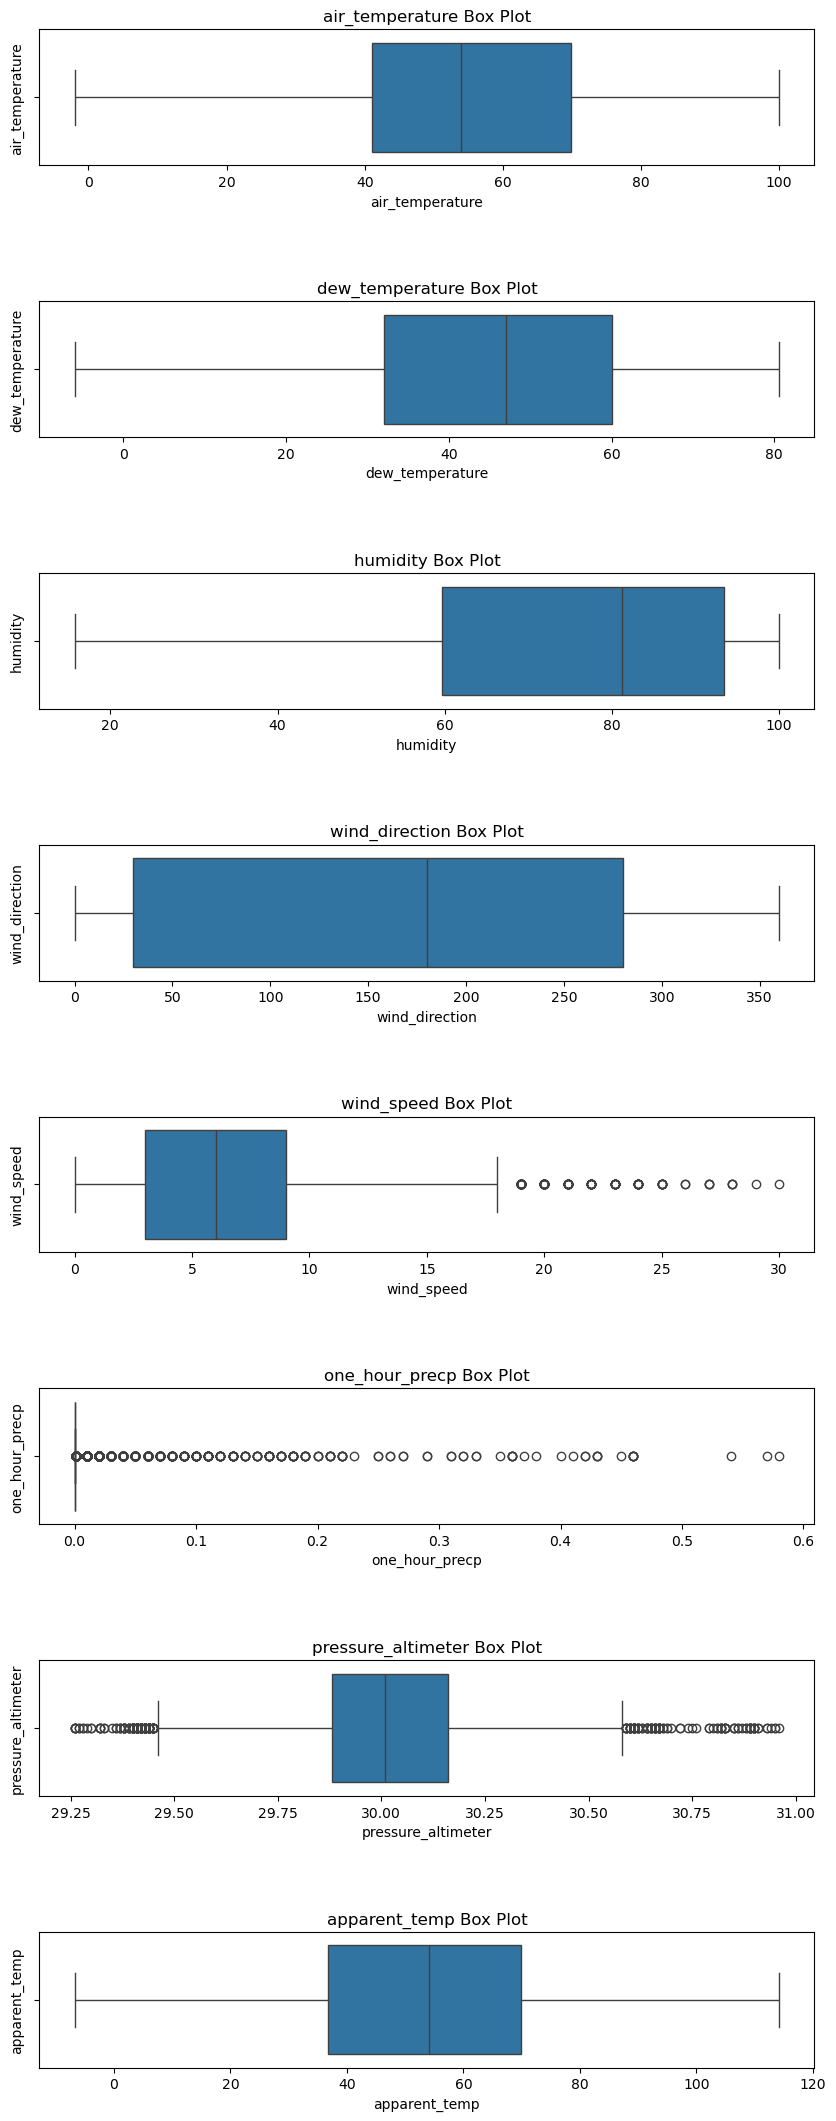

In [37]:
# Box plot for all the numerical columns

fig, axes = plt.subplots(9, 1, figsize=(10, 30))  
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    if col in weather.columns:
        sns.boxplot(x=weather[col], ax=axes[i])  # Box plot for each variable
        axes[i].set_title(f'{col} Box Plot')
        axes[i].set_ylabel(col)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Hide the last unused subplot if necessary
if len(columns_to_plot) < len(axes):
    axes[-1].set_visible(False)

plt.subplots_adjust(hspace=1)
plt.show()

Bivariate EDA (Two Variable Analysis)

In [39]:
#Bivariate EDA (Two Variable Analysis)

# Drop non-numeric columns
weather_numeric = weather.select_dtypes(include=['number'])

# The correlation matrix
correlation_matrix = weather_numeric.corr()
print(correlation_matrix)


                    air_temperature  dew_temperature  humidity  \
air_temperature            1.000000         0.890447 -0.120030   
dew_temperature            0.890447         1.000000  0.338121   
humidity                  -0.120030         0.338121  1.000000   
wind_direction            -0.009537        -0.179818 -0.384151   
wind_speed                 0.141349        -0.070859 -0.451061   
one_hour_precp             0.033981         0.106513  0.179136   
pressure_altimeter        -0.206105        -0.232368 -0.097974   
visibility                 0.069919        -0.099245 -0.415011   
apparent_temp              0.991233         0.899063 -0.082040   

                    wind_direction  wind_speed  one_hour_precp  \
air_temperature          -0.009537    0.141349        0.033981   
dew_temperature          -0.179818   -0.070859        0.106513   
humidity                 -0.384151   -0.451061        0.179136   
wind_direction            1.000000    0.537965       -0.017751   
wind_spee

In [40]:
# Cloud_coverage and Visibility
visibility_by_cloud = weather.groupby('cloud_coverage')['visibility'].mean()
print(visibility_by_cloud)

cloud_coverage
BKN    8.720775
CLR    9.762682
FEW    9.333050
OVC    7.067292
SCT    9.132102
VV     0.791667
Name: visibility, dtype: float64


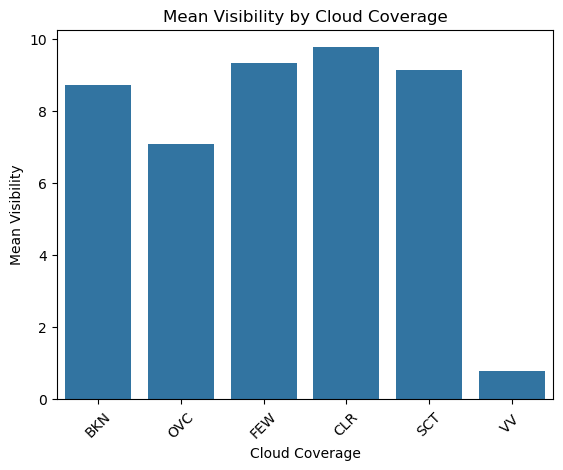

In [41]:

# Cloud_coverage and Visibility
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot to show the mean visibility by cloud coverage
sns.barplot(x='cloud_coverage', y='visibility', data=weather, estimator='mean', errorbar=None)

plt.title('Mean Visibility by Cloud Coverage')
plt.xlabel('Cloud Coverage')
plt.ylabel('Mean Visibility')
plt.xticks(rotation=45)  
plt.show()

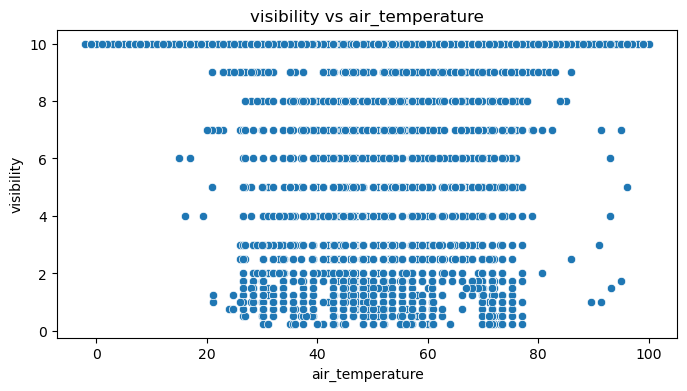

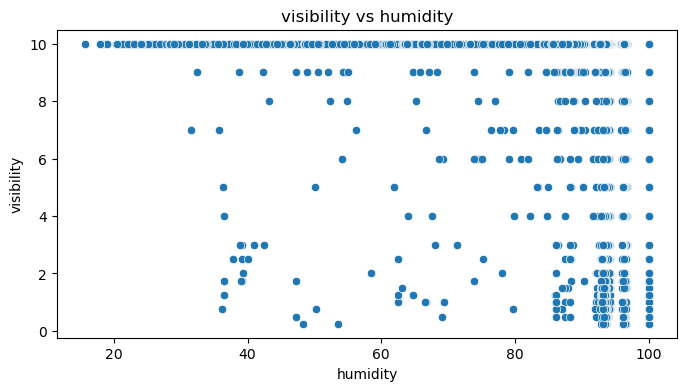

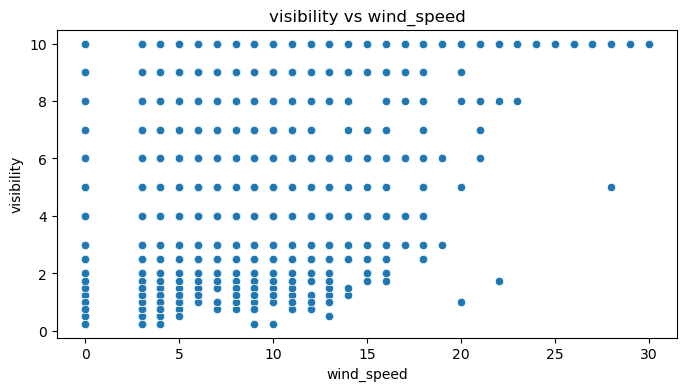

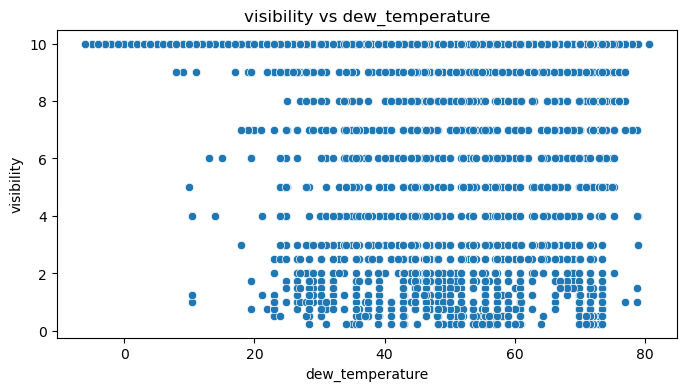

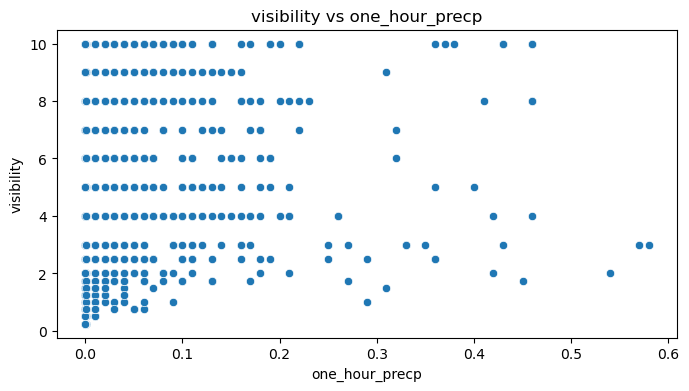

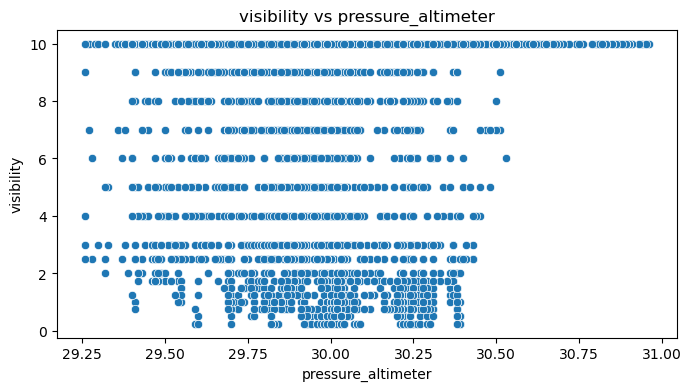

In [42]:

# Visibility with all other Numerical columns
pairs_to_plot = [
    ('air_temperature', 'visibility'),
    ('humidity', 'visibility'),
    ('wind_speed', 'visibility'),
    ('dew_temperature', 'visibility'),
    ('one_hour_precp', 'visibility'),
    ('pressure_altimeter', 'visibility')
]

# Create scatter plots for each pair
for col1, col2 in pairs_to_plot:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=weather[col1], y=weather[col2])
    plt.title(f'{col2} vs {col1}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()



Multivariate EDA (Multiple Variables Analysis)

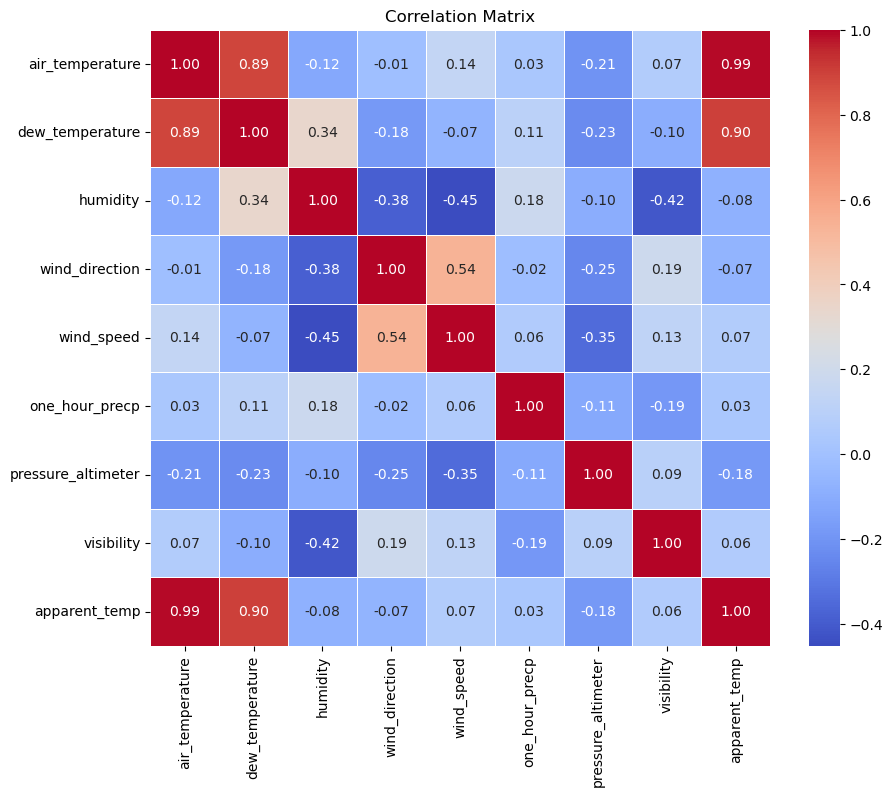

In [44]:
# Multivariate EDA (Multiple Variables Analysis)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<h3 style="color:blue;"><u>Inferential Statistics</u></h3>

<h3 style="color:red;">Hypothesis</h3>


#### Null Hypothesis (H₀):
The null hypothesis states that **climate indicators** do **not** have any significant impact on visibility. 
#### Alternative Hypothesis (H₁):
The alternative hypothesis suggests that **at least one** of the climate indicators **does** have a significant impact on visibility. 

#### Confidence Level
In this analysis, we will use a **95% confidence level** to assess the relationship between climate indicators and visibility. 


In [47]:
#Change the Cloud catagorical data to ordinal numerical data
# Create a dictionary to map each category
ordinal_mapping = {
    'CLR': 0,
    'FEW': 1,
    'SCT': 2,
    'BKN': 3,
    'OVC': 4,
    'VV': 5
}

weather['cloud_ordinal']= weather['cloud_coverage'].map(ordinal_mapping)
weather['cloud_ordinal'].value_counts()
weather = weather.dropna(subset=['cloud_ordinal'])
weather.isna().sum()

station                    0
timestamp                  0
air_temperature            0
dew_temperature            0
humidity                   0
wind_direction             0
wind_speed                 0
one_hour_precp             0
pressure_altimeter         0
visibility                 0
cloud_coverage             0
apparent_temp              0
unprocessed_observation    0
cloud_ordinal              0
dtype: int64

In [48]:
# Slpit the data into Dependent and Independent variable 
x = weather.drop(columns=['visibility', 'cloud_coverage', 'station', 'timestamp', 'unprocessed_observation', 'dew_temperature' , 'apparent_temp', 'wind_direction', 'pressure_altimeter', 'wind_speed'])
y = weather['visibility']
print("X Cloumn Names")
print(x.columns)
print("\n'Y Column Name'")
print(y.name)

X Cloumn Names
Index(['air_temperature', 'humidity', 'one_hour_precp', 'cloud_ordinal'], dtype='object')

'Y Column Name'
visibility


In [49]:
print(x.columns)

Index(['air_temperature', 'humidity', 'one_hour_precp', 'cloud_ordinal'], dtype='object')


In [50]:
# Split the data into 80% training and 20% to testing
# Taing the data using 80% and predicting the 20% x data with the y
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [51]:
#Using GLM for Model Selectin becuase our dependent data is not normal and is skewed.
# GLM with out interection
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Add intercept
x_const = sm.add_constant(x_train)

# Apply log to Y
y_log_transformed = np.log1p(y_train)

# Gamma GLM 
glm_no_interaction = sm.GLM(y_log_transformed, x_const, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(glm_no_interaction.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             visibility   No. Observations:                 8787
Model:                            GLM   Df Residuals:                     8782
Model Family:                   Gamma   Df Model:                            4
Link Function:                    Log   Scale:                        0.041134
Method:                          IRLS   Log-Likelihood:                -8496.1
Date:                Sat, 22 Feb 2025   Deviance:                       637.44
Time:                        21:11:51   Pearson chi2:                     361.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.1961
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0173      0.011     

In [52]:
# Detecting Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF for each Predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(len(x_train.columns))]


print(vif_data)

           Feature       VIF
0  air_temperature  5.426510
1         humidity  6.728688
2   one_hour_precp  1.057841
3    cloud_ordinal  2.300363


Drop the column that has high VIF but one at a time - this step is done above.  
Columns droped for Better VIF, 'dew_temperature' , 'apparent_temp', 'wind_direction', 'pressure_altimeter'.


In [54]:
# Test the Gamma Model
x_test_const = sm.add_constant(x_test)
x_predict = glm_no_interaction.predict(x_test_const)
x_predict_exp = np.expm1(x_predict)

# Check the performace of the Model

mae = mean_absolute_error(y_test, x_predict_exp)
r2 = r2_score(y_test, x_predict_exp)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"r2_score (MAE): {r2}")

print("\nY Prediction of our model")
print(x_predict_exp.head(5))
print("\nY of our test data")
print(y_test.head(5))

Mean Absolute Error (MAE): 2.112296220637588
r2_score (MAE): 0.01482861797319579

Y Prediction of our model
9476     9.989113
8460     8.938657
8663     9.608239
8147     9.986283
4089    11.654920
dtype: float64

Y of our test data
9476    10.0
8460    10.0
8663    10.0
8147    10.0
4089    10.0
Name: visibility, dtype: float64


In [55]:
#Check for independece of residuals using Durbin Test, Value close to 2 is good
from statsmodels.stats.stattools import durbin_watson


# Residuals 
residual = y_test - x_predict_exp
dw_stat = durbin_watson(residual)
print(f"Durbin-Watson Statistic: {dw_stat}")

Durbin-Watson Statistic: 1.9083498150386933


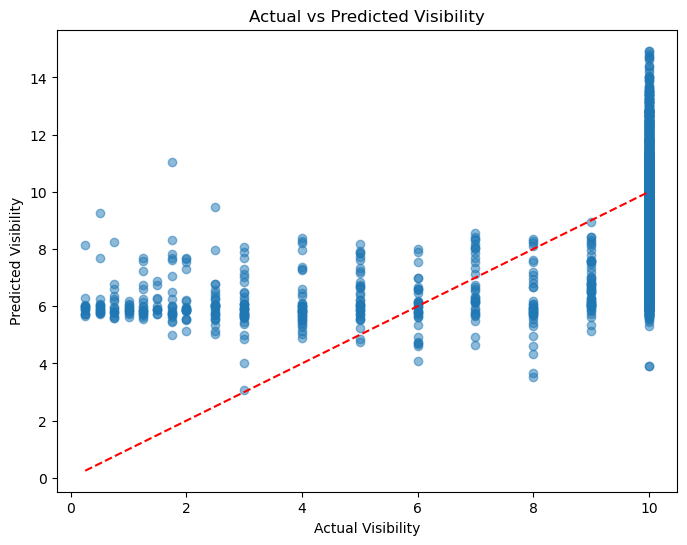

In [56]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, x_predict_exp, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Visibility')
plt.ylabel('Predicted Visibility')
plt.title('Actual vs Predicted Visibility')
plt.show()

In [57]:
# interection for GLM
# Air temperature and Humidity
x_train_temp_humidity = x_train.copy()
x_train_temp_humidity['temp_humidity'] = x_train['air_temperature'] * x_train['humidity']
x_test_temp_humidity = x_test.copy()
x_test_temp_humidity['temp_humidity'] = x_test['air_temperature'] * x_test['humidity']



# Cloud precip and Cloud ordinal
x_train_precip_ordinal= x_train.copy()
x_train_precip_ordinal['cloud_precip'] = x_train['cloud_ordinal'] * x_train['one_hour_precp']
x_test_precip_ordinal = x_test.copy()
x_test_precip_ordinal['cloud_precip'] = x_test['cloud_ordinal'] * x_test['one_hour_precp']


# All interection together
x_train_all_interection= x_train.copy()
x_train_all_interection['temp_humidity'] = x_train['air_temperature'] * x_train['humidity']
x_train_all_interection['cloud_precip'] = x_train['cloud_ordinal'] * x_train['one_hour_precp']
x_test_all_interection= x_test.copy()
x_test_all_interection['temp_humidity'] = x_test['air_temperature'] * x_test['humidity']
x_test_all_interection['cloud_precip'] = x_test['cloud_ordinal'] * x_test['one_hour_precp']

In [58]:
# GLM with Interection
x_train_temp_humidity_const = sm.add_constant(x_train_temp_humidity)
x_test_temp_humidity_const = sm.add_constant(x_test_temp_humidity)

# Fit GLM with temp_humidity interaction
glm_temp_humidity = sm.GLM(y_log_transformed, x_train_temp_humidity_const, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(glm_temp_humidity.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             visibility   No. Observations:                 8787
Model:                            GLM   Df Residuals:                     8781
Model Family:                   Gamma   Df Model:                            5
Link Function:                    Log   Scale:                        0.041056
Method:                          IRLS   Log-Likelihood:                -8446.8
Date:                Sat, 22 Feb 2025   Deviance:                       632.87
Time:                        21:11:51   Pearson chi2:                     361.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.2065
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2829      0.027     

In [59]:
# Fit predictio temp_humidity interaction

x_train_temp_humidity_pridict = glm_temp_humidity.predict(x_test_temp_humidity_const)
x_train_temp_humidity_exp = np.exp(x_train_temp_humidity_pridict)

temp_humidity_mae = mean_absolute_error(y_test, x_train_temp_humidity_exp)
temp_humidity_r2 = r2_score(y_test, x_train_temp_humidity_exp)

print(f"Mean Absolute Error (MAE): {temp_humidity_mae}")
print(f"r2_score (MAE): {temp_humidity_r2}")

print("\nY Prediction of our model")
print(x_train_temp_humidity_exp)
print("\nY of our test data")
print(y_test)

Mean Absolute Error (MAE): 2.0128227699797416
r2_score (MAE): 0.002620414929698889

Y Prediction of our model
9476    11.552752
8460     9.838765
8663    10.781515
8147    11.144601
4089    11.980807
          ...    
197      8.081709
4464     8.074958
3342     9.077614
9367     7.826581
7112     9.242599
Length: 2197, dtype: float64

Y of our test data
9476    10.0
8460    10.0
8663    10.0
8147    10.0
4089    10.0
        ... 
197     10.0
4464    10.0
3342    10.0
9367    10.0
7112    10.0
Name: visibility, Length: 2197, dtype: float64


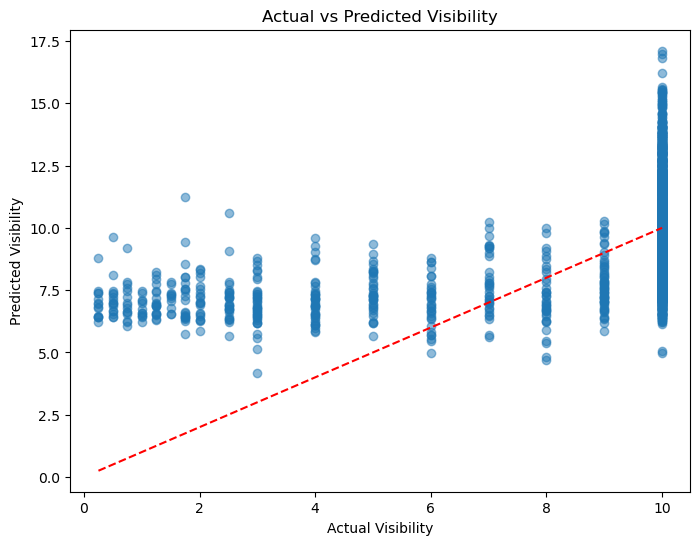

In [60]:
# temp_humidity and interactionpridiction and test Y graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, x_train_temp_humidity_exp, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Visibility')
plt.ylabel('Predicted Visibility')
plt.title('Actual vs Predicted Visibility')
plt.show()

In [61]:
# GLM with Interection Cloud precip and Cloud ordinal
x_train_precip_ordinal_const = sm.add_constant(x_train_precip_ordinal)
x_test_precip_ordinal_const = sm.add_constant(x_test_precip_ordinal)

# Fit GLM with temp_humidity interaction
glm_precip_ordinal = sm.GLM(y_log_transformed, x_train_precip_ordinal_const, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(glm_precip_ordinal.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             visibility   No. Observations:                 8787
Model:                            GLM   Df Residuals:                     8781
Model Family:                   Gamma   Df Model:                            5
Link Function:                    Log   Scale:                        0.041093
Method:                          IRLS   Log-Likelihood:                -8497.2
Date:                Sat, 22 Feb 2025   Deviance:                       637.26
Time:                        21:11:52   Pearson chi2:                     361.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.1967
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0178      0.011     

In [62]:
# Fit predictio Cloud precip and Cloud ordinal

x_train_precip_ordinal_pridict = glm_precip_ordinal.predict(x_test_precip_ordinal_const)
x_train_precip_ordinal_exp = np.exp(x_train_precip_ordinal_pridict)

precip_ordinal_mae = mean_absolute_error(y_test, x_train_precip_ordinal_exp)
precip_ordinal_r2 = r2_score(y_test, x_train_precip_ordinal_exp)

print(f"Mean Absolute Error (MAE): {precip_ordinal_mae}")
print(f"r2_score (MAE): {precip_ordinal_r2}")

print("\nY Prediction of our model")
print(x_train_precip_ordinal_exp)
print("\nY of our test data")
print(y_test)

Mean Absolute Error (MAE): 1.9939650635026327
r2_score (MAE): 0.005230577615855214

Y Prediction of our model
9476    10.983616
8460     9.928449
8663    10.589235
8147    10.973366
4089    12.630202
          ...    
197      8.891915
4464     7.825516
3342     9.025548
9367     7.799231
7112     9.276815
Length: 2197, dtype: float64

Y of our test data
9476    10.0
8460    10.0
8663    10.0
8147    10.0
4089    10.0
        ... 
197     10.0
4464    10.0
3342    10.0
9367    10.0
7112    10.0
Name: visibility, Length: 2197, dtype: float64


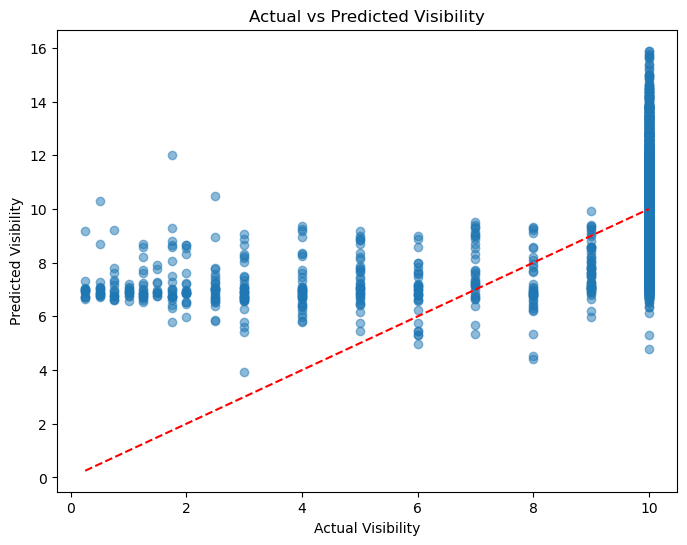

In [63]:
# Cloud precip and Cloud ordinal pridiction and test Y graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, x_train_precip_ordinal_exp, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Visibility')
plt.ylabel('Predicted Visibility')
plt.title('Actual vs Predicted Visibility')
plt.show()

In [64]:
# GLM with all Interection
x_train_all_interection_const = sm.add_constant(x_train_all_interection)
x_test_all_interection_const = sm.add_constant(x_test_all_interection)

# Fit GLM with all Interection
glm_all_int = sm.GLM(y_log_transformed, x_train_all_interection_const, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(glm_all_int.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             visibility   No. Observations:                 8787
Model:                            GLM   Df Residuals:                     8780
Model Family:                   Gamma   Df Model:                            6
Link Function:                    Log   Scale:                        0.041029
Method:                          IRLS   Log-Likelihood:                -8447.8
Date:                Sat, 22 Feb 2025   Deviance:                       632.78
Time:                        21:11:52   Pearson chi2:                     360.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.2069
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2812      0.027     

In [65]:
# Fit predictio All Interection

x_train_all_interection_pridict = glm_all_int.predict(x_test_all_interection_const)
x_train_all_interection_exp = np.exp(x_train_all_interection_pridict)

all_int_mae = mean_absolute_error(y_test, x_train_all_interection_exp)
all_int_r2 = r2_score(y_test, x_train_all_interection_exp)

print(f"Mean Absolute Error (MAE): {all_int_mae}")
print(f"r2_score (MAE): {all_int_r2}")

print("\nY Prediction of our model")
print(x_train_all_interection_exp)
print("\nY of our test data")
print(y_test)

Mean Absolute Error (MAE): 2.0077706267887874
r2_score (MAE): 0.0053725450633936855

Y Prediction of our model
9476    11.543824
8460     9.832056
8663    10.765807
8147    11.133613
4089    11.968966
          ...    
197      8.084328
4464     8.078843
3342     9.073733
9367     7.833236
7112     9.232720
Length: 2197, dtype: float64

Y of our test data
9476    10.0
8460    10.0
8663    10.0
8147    10.0
4089    10.0
        ... 
197     10.0
4464    10.0
3342    10.0
9367    10.0
7112    10.0
Name: visibility, Length: 2197, dtype: float64


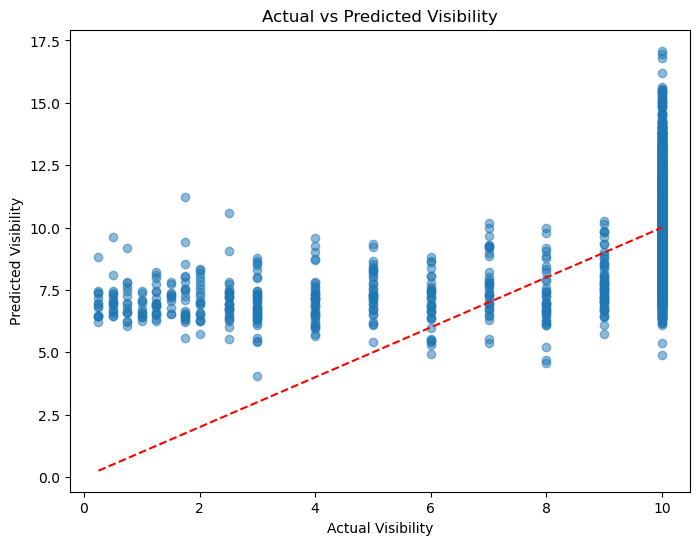

In [66]:
# All interection pridiction and test Y graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, x_train_all_interection_exp, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Visibility')
plt.ylabel('Predicted Visibility')
plt.title('Actual vs Predicted Visibility')
plt.show()

In [67]:
# Applying log for the Independent skewed variables
x_train_log = x_train.copy()
x_test_log = x_test.copy()

# Apply log transformation to training data
x_train_log['one_hour_precp'] = np.log1p(x_train_log['one_hour_precp'])
x_train_log['humidity'] = np.log1p(x_train_log['humidity'])

# Apply the same transformation to the test data (using the same function)
x_test_log['one_hour_precp'] = np.log1p(x_test_log['one_hour_precp'])
x_test_log['humidity'] = np.log1p(x_test_log['humidity'])


In [68]:
# GLM with log Indipendent
x_train_log_constant = sm.add_constant(x_train_log)
x_test_log_constant = sm.add_constant(x_test_log)


# Fit GLM with log Independent vairable
glm_log = sm.GLM(y_log_transformed, x_train_log_constant, family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [69]:
# Fit predictio log glm

x_train_log_pridict = glm_log.predict(x_test_log_constant)
x_train_log_expt = np.exp(x_train_log_pridict)


log__mae = mean_absolute_error(y_test, x_train_log_expt)
log__r2 = r2_score(y_test, x_train_log_expt)

print(f"Mean Absolute Error (MAE): {log__mae}")
print(f"r2_score (MAE): {log__r2}")
print("\nY Prediction of our model")
print(x_train_log_expt)
print("\nY of our test data")
print(y_test)

Mean Absolute Error (MAE): 1.9246976520248813
r2_score (MAE): 0.009507626747307762

Y Prediction of our model
9476    10.663874
8460     9.973972
8663    10.604042
8147    10.763191
4089    12.279949
          ...    
197      9.181435
4464     7.930508
3342     9.179295
9367     7.841671
7112     9.666658
Length: 2197, dtype: float64

Y of our test data
9476    10.0
8460    10.0
8663    10.0
8147    10.0
4089    10.0
        ... 
197     10.0
4464    10.0
3342    10.0
9367    10.0
7112    10.0
Name: visibility, Length: 2197, dtype: float64


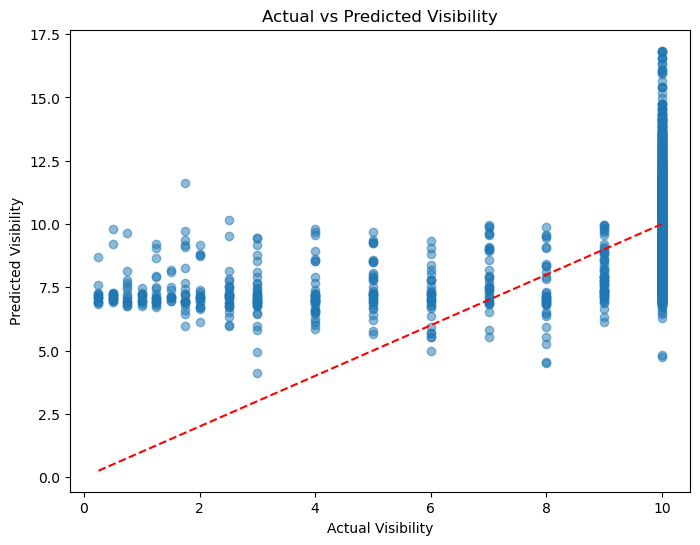

In [70]:
# All log 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, x_train_log_expt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Visibility')
plt.ylabel('Predicted Visibility')
plt.title('Actual vs Predicted Visibility')
plt.show()